# importation

In [2]:
%load_ext autoreload
%autoreload 2

In [35]:
from cmath import nan
from matplotlib.collections import PathCollection
import pandas as pd
from os import path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from Plot import fit_sigm
from GM_analysisChipsDrugsAloneE9E11 import *

# Loading of the files

In [5]:
dfEto, dfEtoBarcode, dfCis, dfCisBarcode = readDataChips()

#adding drugs data

In [6]:
dfEtoFull = addDataDrugsChips(dfEto,dfEtoBarcode,"Etoposide")
dfCisFull = addDataDrugsChips(dfCis,dfCisBarcode,"Cisplatin")

print(dfCisFull.control.unique())
print(dfEtoFull.control.unique())


['NaCl' False]
[False 'DMSO']


# FIltering values from wrong detections

In [7]:
dfCisFullFiltered,dfCtlCis = removeBadPoints(dfCisFull,ctlName="NaCl")

dfEtoFullFiltered,dfCtlEto = removeBadPoints(dfEtoFull,ctlName="DMSO")

# adding R0

In [8]:
dfR0Cis, dfCisFullFiltered = addR0(dfCisFullFiltered)
dfR0Eto, dfEtoFullFiltered = addR0(dfEtoFullFiltered)

dates:['210623' '210624' '210625' '210626']
dates:['210713' '210714' '210715' '210716' '210717']


# adding the ranges of concentrations

In [7]:

dfCisFullFiltered = addPooledConcentration(dfCisFullFiltered)
dfEtoFullFiltered = addPooledConcentration(dfEtoFullFiltered)

C:15.137554382368847, centraleC:10
C:15.137554382368847, centraleC:10
C:15.137554382368847, centraleC:10
C:22.233668312610817, centraleC:10
C:22.233668312610817, centraleC:10
C:22.233668312610817, centraleC:10
C:22.233668312610817, centraleC:10
C:2.5364472767910056, centraleC:1
C:2.5364472767910056, centraleC:1
C:2.5364472767910056, centraleC:1
C:2.5364472767910056, centraleC:1
C:35.17430108715906, centraleC:25
C:35.17430108715906, centraleC:25
C:35.17430108715906, centraleC:25
C:35.17430108715906, centraleC:25
C:1.3331352686822089, centraleC:1
C:1.3331352686822089, centraleC:1
C:1.3331352686822089, centraleC:1
C:1.3331352686822089, centraleC:1
C:25.48010124069934, centraleC:25
C:25.48010124069934, centraleC:25
C:25.48010124069934, centraleC:25
C:25.48010124069934, centraleC:25
C:1.3528131116310964, centraleC:1
C:1.3528131116310964, centraleC:1
C:1.3528131116310964, centraleC:1
C:1.3528131116310964, centraleC:1
C:0.09387122305022413, centraleC:0.05
C:0.09387122305022413, centraleC:0.05

# Plot IC50 with R0

[0.90365049 7.21188847 9.25773933 0.35228288]
[0.86835117 1.34136449 4.87229761 0.21033503]
[0.84007114 0.850391   3.63622438 0.10623289]


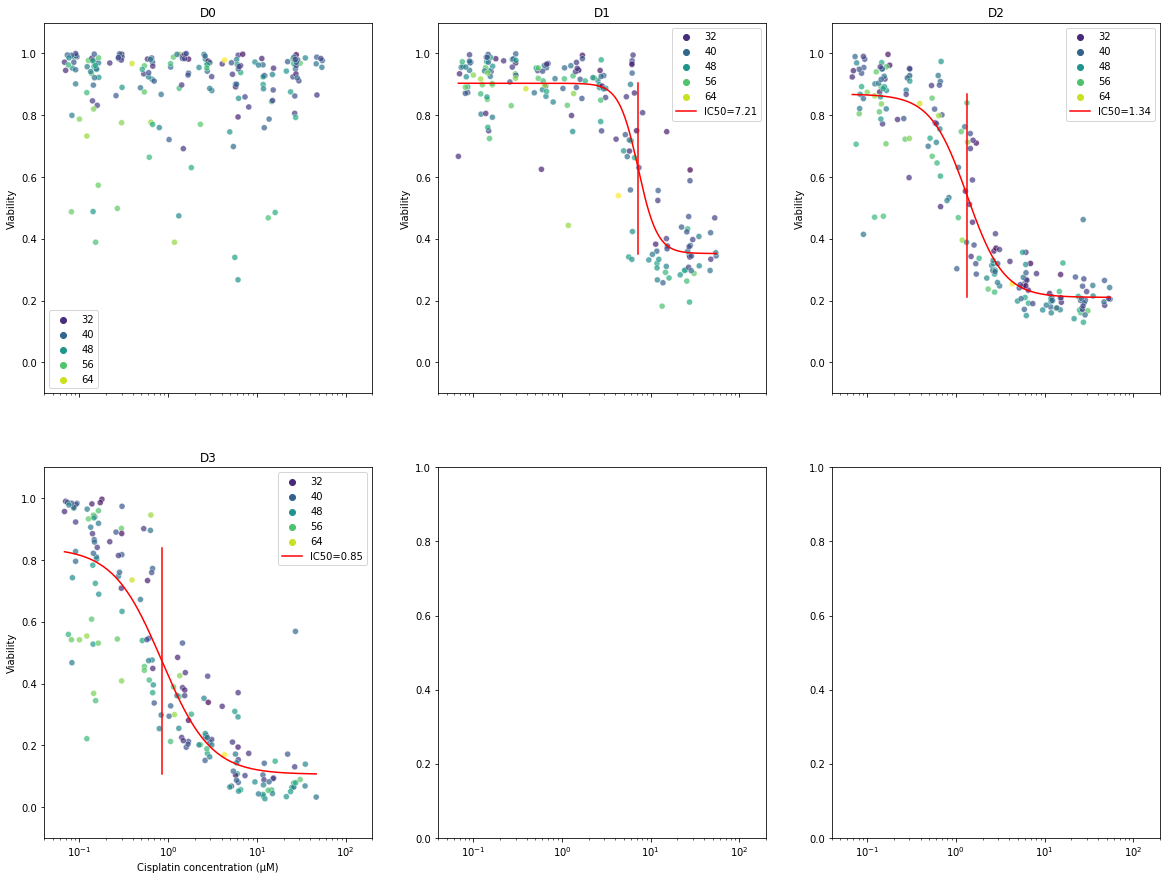

In [9]:
plot_Chip(dfCisFullFiltered)

[ 0.91463802  1.70631576 15.06375588  0.25152952]
[0.93142905 1.47805169 6.46017701 0.23146355]
[0.90936313 0.86683925 4.55196939 0.16640835]
[0.68537069 0.44670453 6.22806707 0.20160917]


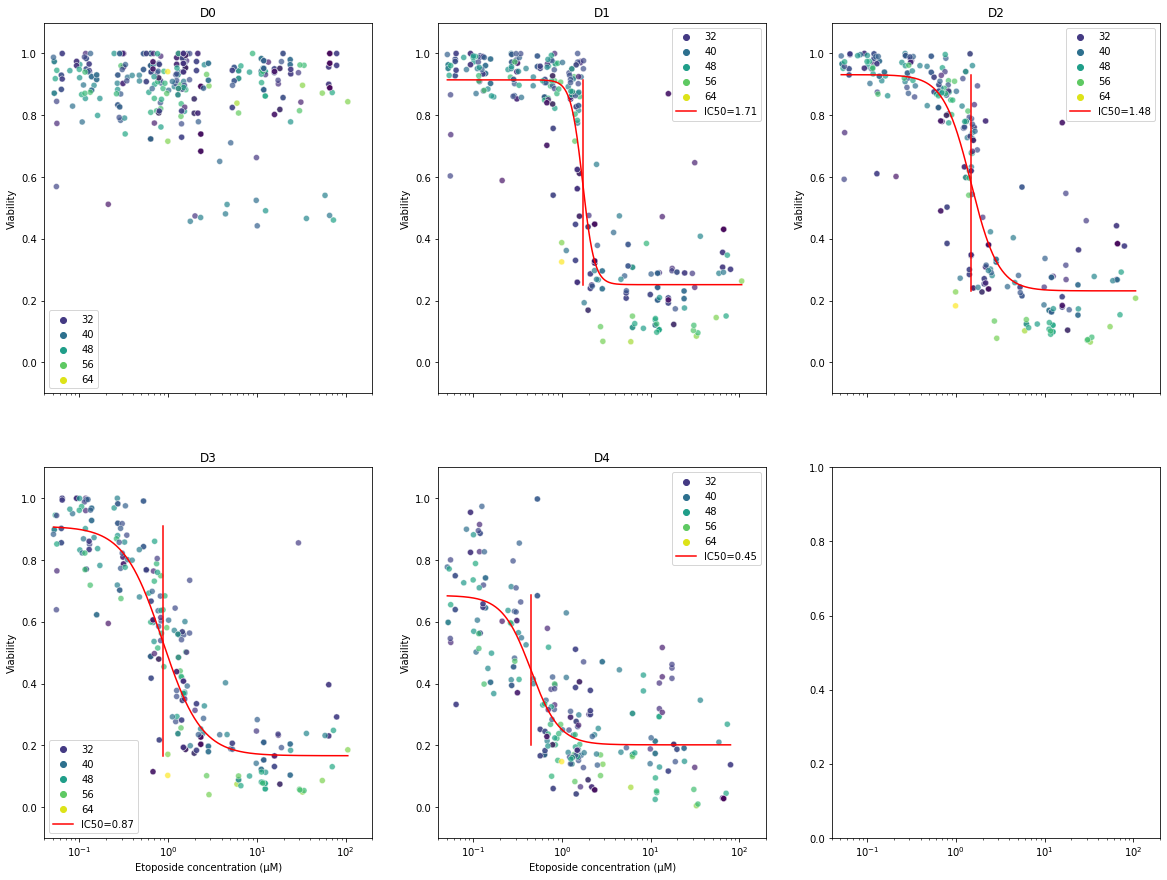

In [22]:
plot_Chip(dfEtoFullFiltered)

# IC50 and boxplots R0

['210623' '210624' '210625' '210626']


c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.90365049 7.21188847 9.25773933 0.35228288]


c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.86835117 1.34136449 4.87229761 0.21033503]


c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.84007114 0.850391   3.63622438 0.10623289]


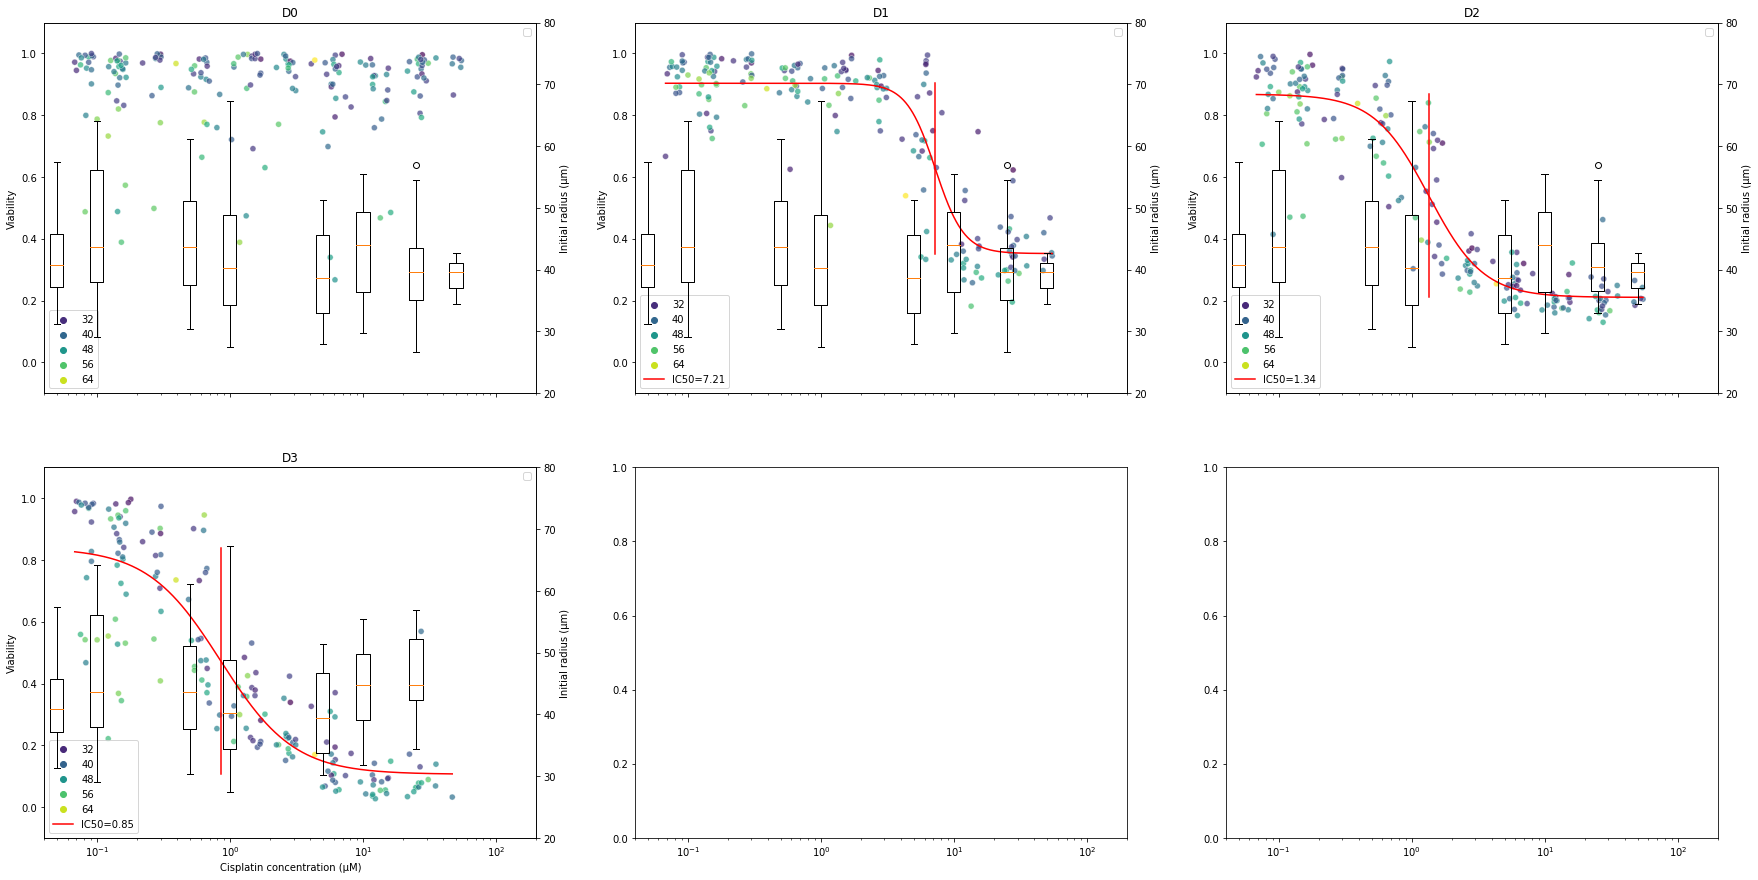

In [27]:

plot_IC50_BoxPlotR0(dfCisFullFiltered)

c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['210713' '210714' '210715' '210716' '210717']


c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 0.91463802  1.70631576 15.06375588  0.25152952]


c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.93142905 1.47805169 6.46017701 0.23146355]


c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.90936313 0.86683925 4.55196939 0.16640835]


c:\Users\GaetanMary\Okomera\Okomera_public - Documents\Interns\2021_Romain_FEVRE_Master\20220726_analysis_toBeUsed\analysis\GM_analysisChipsDrugsAloneE9E11.py:301: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataBoxPlot.append(dfData[df["centraleC"] == pos].viability.values.tolist())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.68537069 0.44670453 6.22806707 0.20160917]


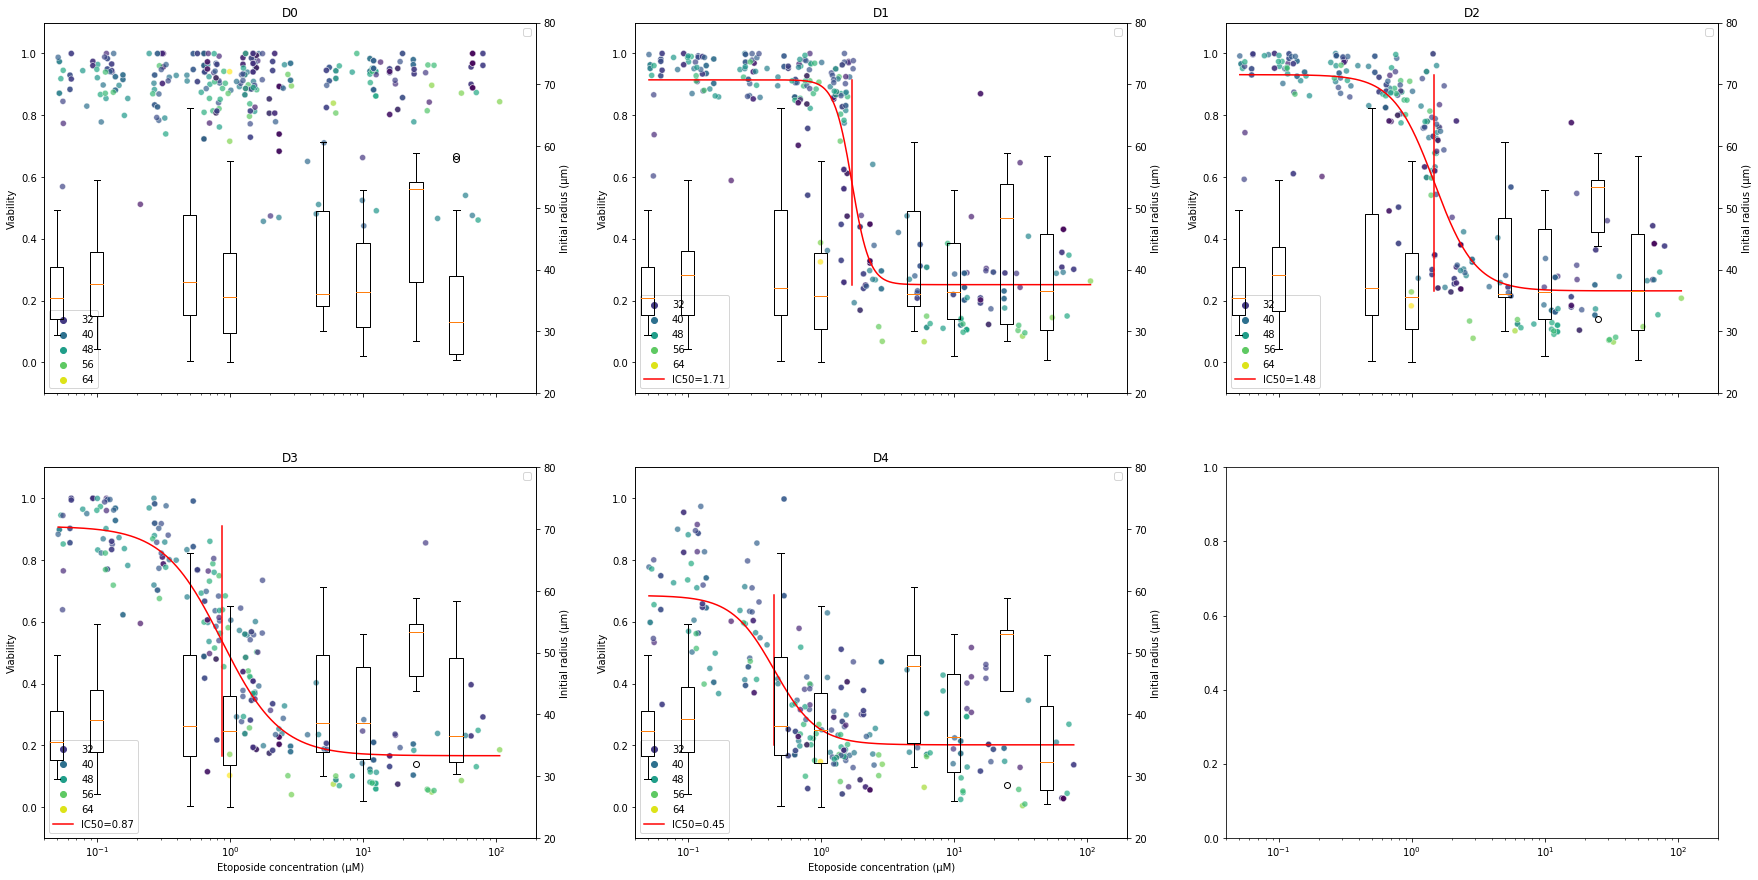

In [28]:

plot_IC50_BoxPlotR0(dfEtoFullFiltered)

#New version of the plots 20221010



[ 0.91463802  1.70631576 15.06375588  0.25152952]
[0.93142905 1.47805169 6.46017701 0.23146355]
[0.90936313 0.86683925 4.55196939 0.16640835]
[0.68537069 0.44670453 6.22806707 0.20160917]


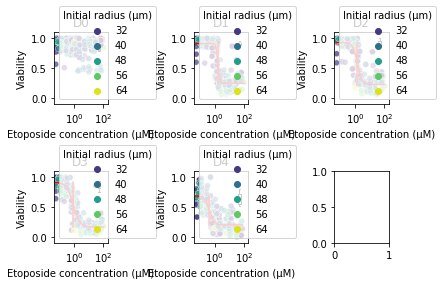

In [34]:

plot_Chip(dfEtoFullFiltered,save=True, xlab = "Etoposide concentration (µM)", fileName ="20221010_Chips_Etoposide_noFit_resized",printFit = False)

In [22]:
plot_Chip(dfCisFullFiltered,save=True, xlab = "Cisplatin concentration (µM)", fileName ="20221010_Chips_Cisplatin_noFit_resized",printFit = False)

[0.90365049 7.21188847 9.25773933 0.35228288]
[0.86835117 1.34136449 4.87229761 0.21033503]
[0.84007114 0.850391   3.63622438 0.10623289]


[0.86835117 1.34136449 4.87229761 0.21033503]


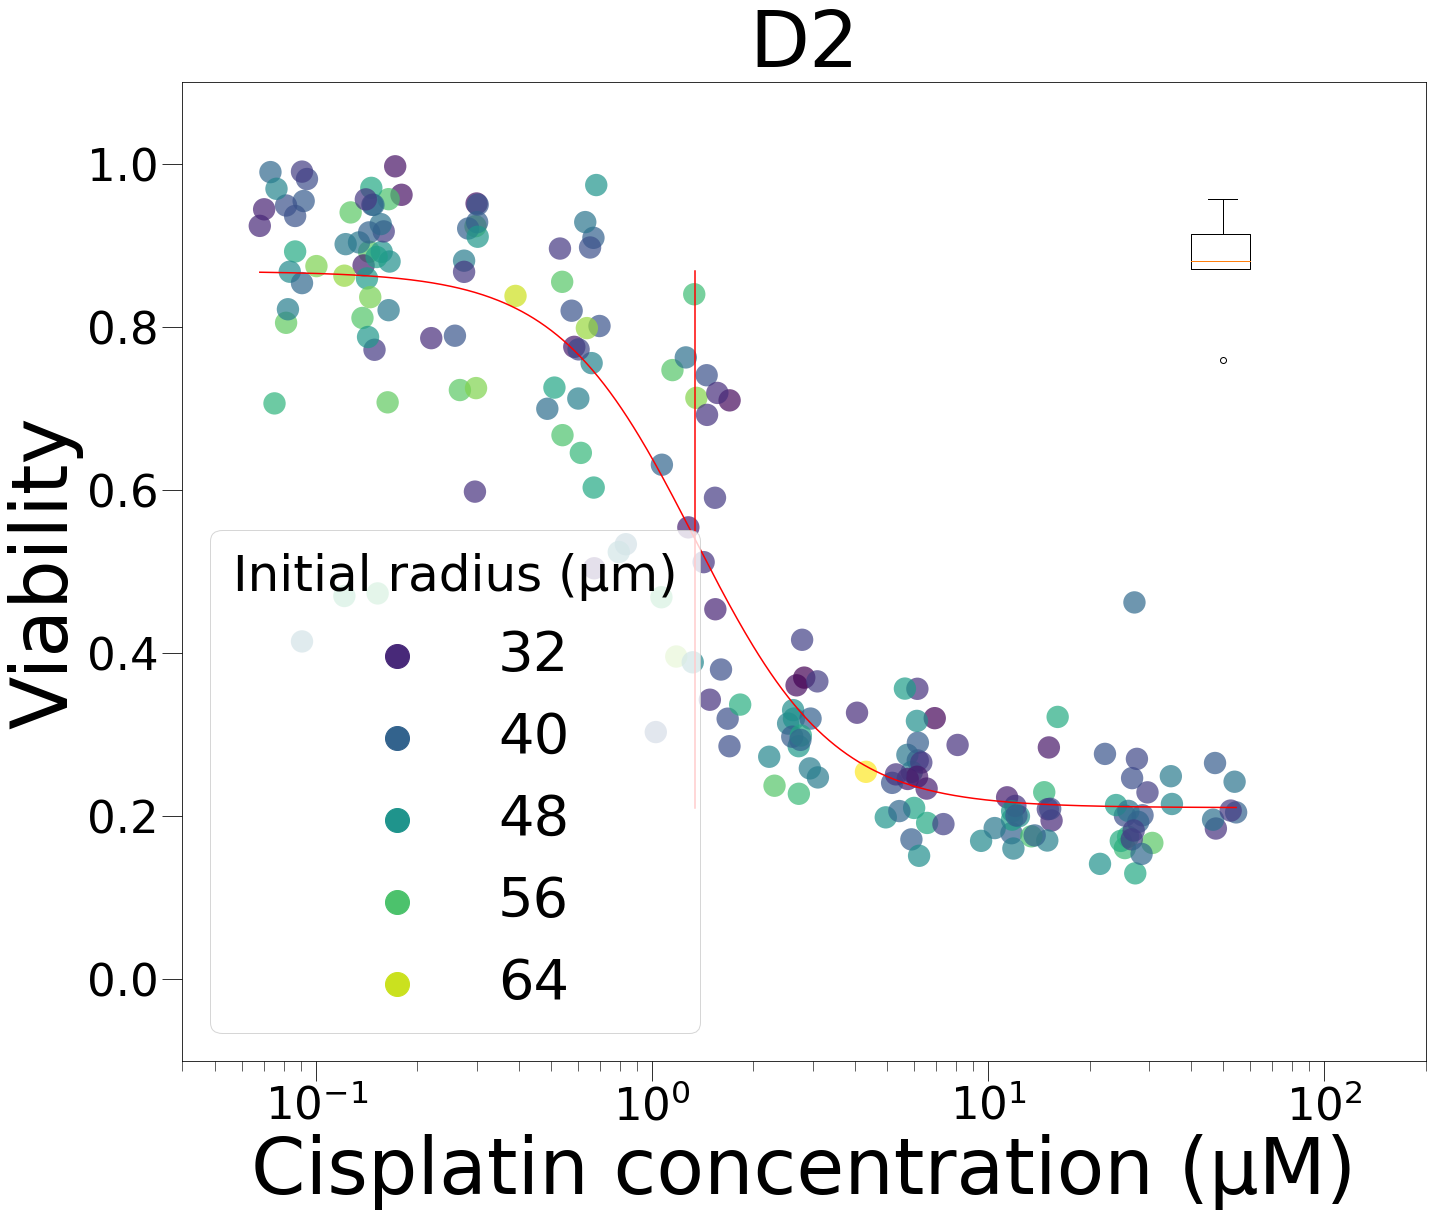

In [36]:
plot_ChipD2(dfCisFullFiltered,save=True, xlab = "Cisplatin concentration (µM)", fileName ="20221011_Chips_D2only_Cisplatin_noFit_resized",printFit = False)

[0.93142905 1.47805169 6.46017701 0.23146355]


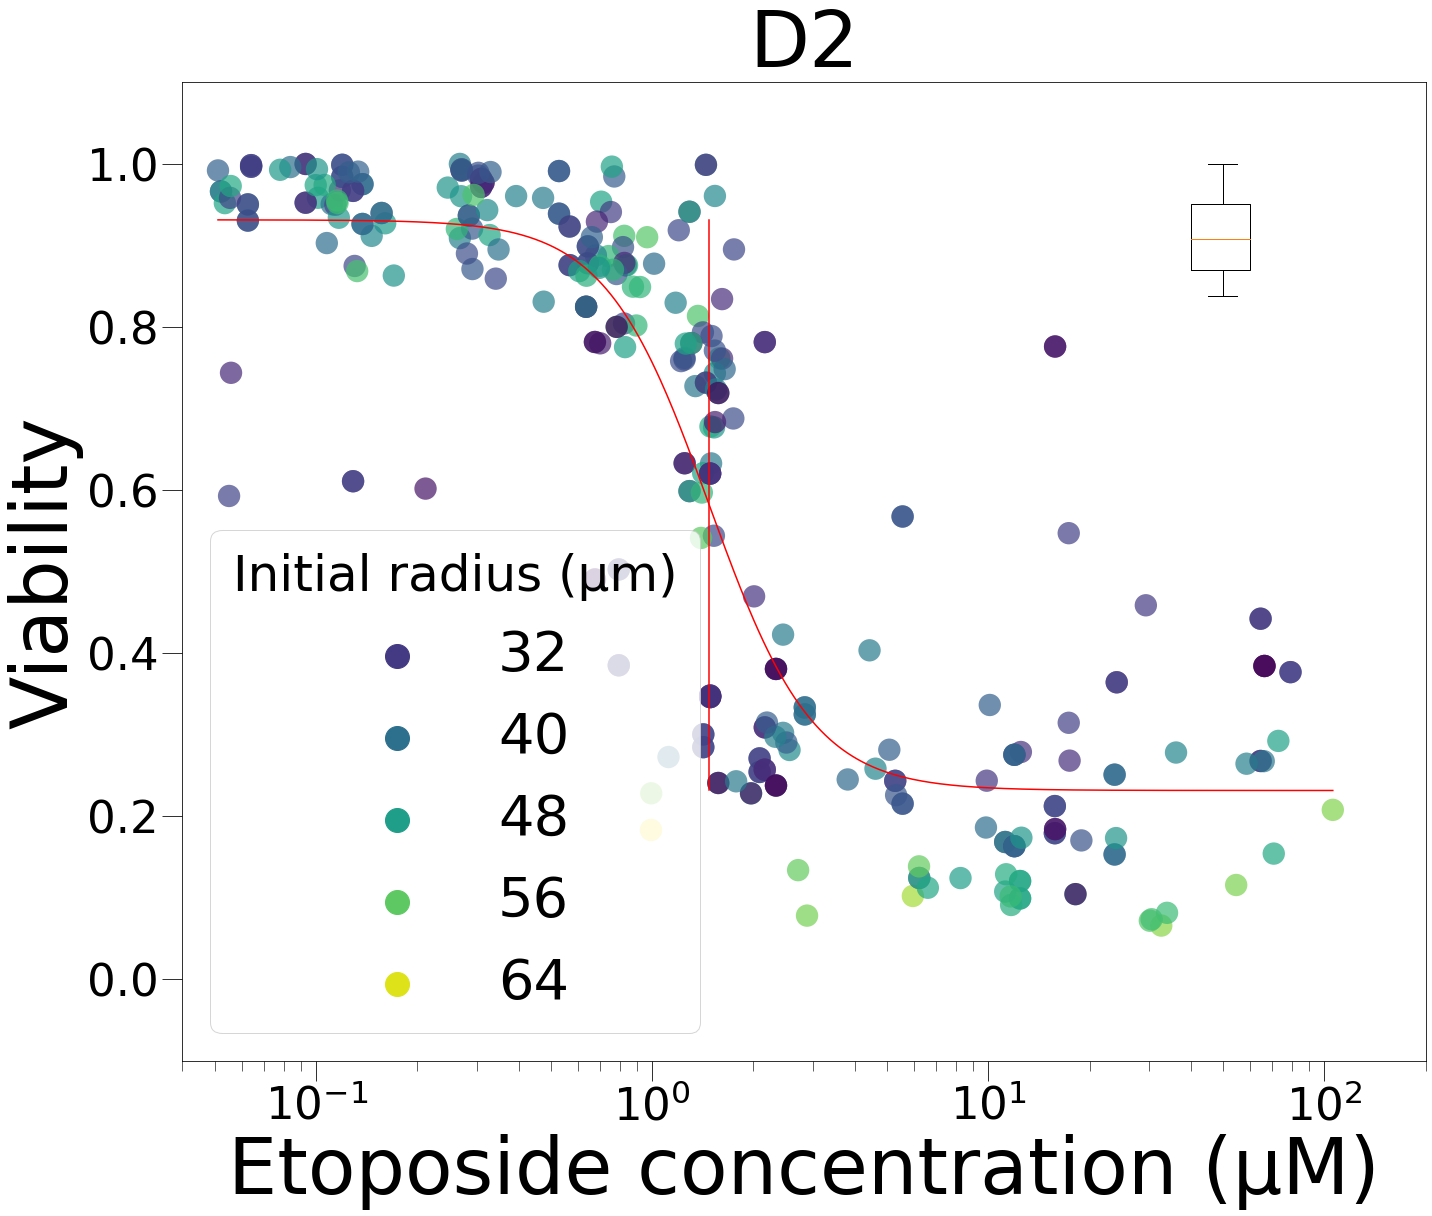

In [37]:
plot_ChipD2(dfEtoFullFiltered,save=True, xlab = "Etoposide concentration (µM)", fileName ="20221011_Chips_D2only_Etoposide_noFit_resized",printFit = False)

In [24]:
dfCtlEto =  dfEtoFullFiltered[dfEtoFullFiltered["control"]!=False]
dfCtlCis =  dfCisFullFiltered[dfCisFullFiltered["control"]!=False]

In [42]:
print(dfCisFullFiltered.date.unique())
print(dfEtoFullFiltered.date.unique())
print(dfCis.date.unique())

['210623' '210624' '210625' '210626']
['210713' '210714' '210715' '210716' '210717']
['210623' '210624' '210625' '210626' '210627']
